In [1]:
%run preamble.py
%matplotlib inline

!mkdir -p images tables results

from IPython.display import HTML

In [2]:
#
# /getStats Dataset
#
DS_NAME="API Latencies"
FILENAME="datasets/{}-{}.npy".format(6 * 7 * 24, 60 * 10)
DS_DATA = np.load(FILENAME, allow_pickle=True)
DS_QUANTILES = [0, .25, 0.5, 0.75, .9, .95, .99, .995, .999, .9999, .99999, 1 ]

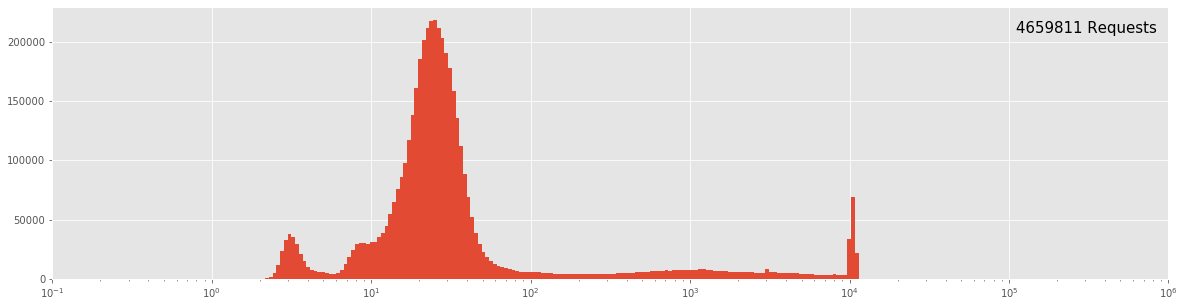

In [3]:
total = np.concatenate(DS_DATA)
ax = log_plot(total, [])
plt.savefig("images/" + DS_NAME + "_distribution")

In [4]:
STATS = evaluate_all(DS_DATA, DS_QUANTILES)

# exact
Insert .........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [5]:
save(json.dumps(STATS), "results/" + DS_NAME + ".json")

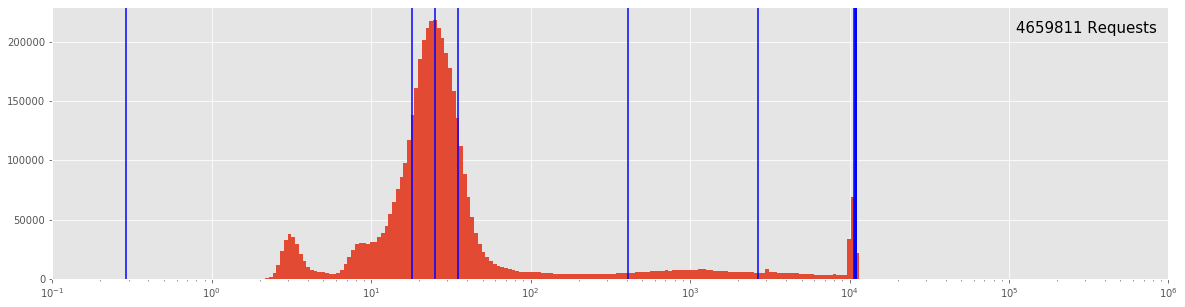

In [6]:
log_plot(total, [STATS["exact"]["quantiles"][q] for q in DS_QUANTILES ])
plt.savefig("images/" + DS_NAME + "_distribution_percentiles")

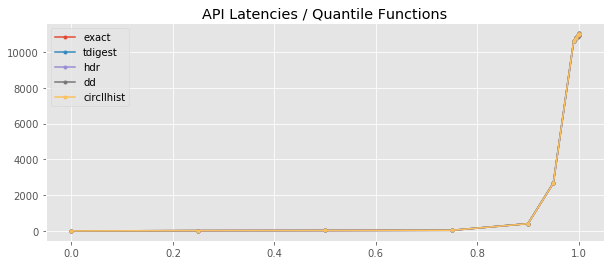

In [7]:
#
# Stats: Quantiles
#
df = stats_quantiles(STATS)[METHODS]

save(df.to_latex(), "tables/" + DS_NAME + "_quantiles.tex")

plt.figure(figsize=(10,4))
plt.title(DS_NAME + " / Quantile Functions")
for name in METHODS:
    plt.plot(DS_QUANTILES, [ STATS[name]["quantiles"][q] for q in DS_QUANTILES ] ,".-")

plt.legend(METHODS)
plt.savefig("images/" + DS_NAME + "_quantile_comparison")

In [8]:
df

,exact,tdigest,hdr,dd,circllhist
q0,0.290775,0.290775,0.290,0.290775,0.290385
q.25,17.911811,17.950573,17.919,17.994143,17.911775
q.5,24.914646,24.914638,24.927,24.780499,24.915317
q.75,34.875410,34.892596,34.879,34.815697,34.875685
q.9,404.770819,410.364935,404.991,407.544587,404.748022
q.95,2670.851152,2695.063664,2672.639,2671.012821,2670.348510
q.99,10600.161716,10593.161512,10600.447,10617.501634,10611.333061
q.995,10788.963851,10786.155686,10797.055,10831.996616,10805.658190
q.999,10939.060919,10935.791336,10944.511,10831.996616,10961.124966
q.9999,10972.372995,10971.552113,10977.279,11050.824831,10996.104990


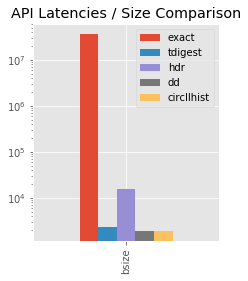

In [9]:
#
# Stats: Size
#
df = stats_size(STATS)[METHODS]

save(df.to_latex(), "tables/" + DS_NAME + "_size.tex")

fig = plt.figure(figsize=(10/3,4))
ax = plt.subplot(1,1,1)
df.plot(kind="bar", ax=ax)
plt.yscale("log")
plt.title(DS_NAME + " / Size Comparison")
plt.savefig("images/" + DS_NAME + "_size")

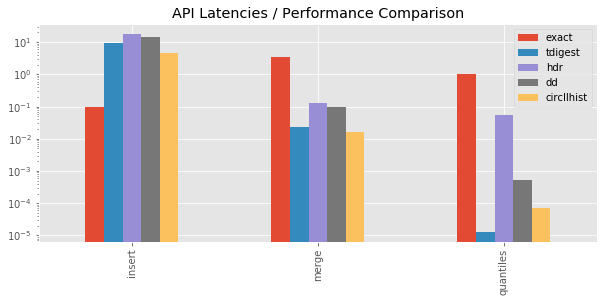

In [10]:
#
# Stast: Timing
#
df = stats_timing(STATS)[METHODS]

save(df.to_latex(), "tables/" + DS_NAME + "_perf.tex")

fig = plt.figure(figsize=(10, 4))
ax = plt.subplot(1,1,1)
df.plot(kind="bar", ax=ax)
plt.yscale("log")
plt.title(DS_NAME + " / Performance Comparison")
plt.savefig("images/" + DS_NAME + "_perf")

In [11]:
df

,exact,tdigest,hdr,dd,circllhist
insert,0.098752,9.096915,17.924451,14.212655,4.611953
merge,3.423716,0.023258,0.130884,0.098603,0.015855
quantiles,1.017010,0.000013,0.053731,0.000518,0.000072


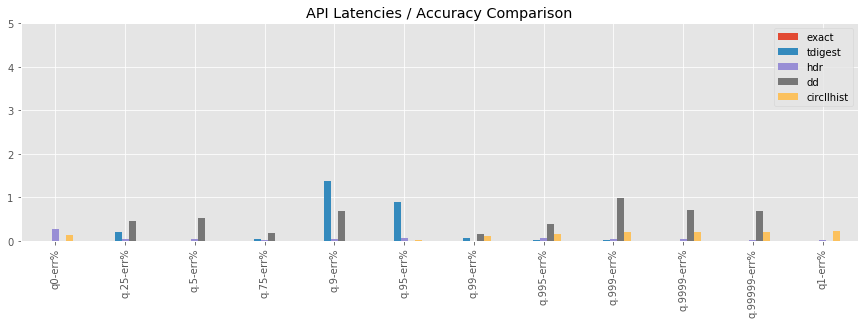

In [12]:
#
# Stats: Accuracy
#
df = stats_qerr(STATS)[METHODS]

save(df.to_latex(), "tables/" + DS_NAME + "_accuracy.tex")

fig = plt.figure(figsize=(15, 4))
ax = plt.subplot(1,1,1)
df.plot(kind="bar", ax=ax)
plt.yscale("linear")
plt.ylim(0, 5)
plt.title(DS_NAME + " / Accuracy Comparison")
plt.savefig("images/" + DS_NAME + "_accuracy")

In [13]:
df

,exact,tdigest,hdr,dd,circllhist
q0-err%,0.0,0.000000,0.266603,0.000000,0.134331
q.25-err%,0.0,0.216407,0.040137,0.459655,0.000199
q.5-err%,0.0,0.000031,0.049586,0.538426,0.002692
q.75-err%,0.0,0.049279,0.010294,0.171219,0.000788
q.9-err%,0.0,1.382045,0.054396,0.685269,0.005632
q.95-err%,0.0,0.906547,0.066939,0.006053,0.018820
q.99-err%,0.0,0.066039,0.002691,0.163582,0.105388
q.995-err%,0.0,0.026028,0.074995,0.398859,0.154735
q.999-err%,0.0,0.029889,0.049822,0.978734,0.201700
q.9999-err%,0.0,0.007481,0.044712,0.714994,0.216289
